<a href="https://colab.research.google.com/github/Darshini-A/Data-Science-2/blob/main/Regresssion%20%3A%20abalone%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Q:1 find out age of abalone from physical measurements
# Regression models

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset, replace 'abalone_data.csv' with your dataset's file path.
data = pd.read_csv('/content/abalone_original.csv')
data.head()

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7


In [ ]:
data.shape

(4177, 9)

In [ ]:
data['age'] = data.rings + 1.5
data.head()

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings,age
0,M,91,73,19,102.8,44.9,20.2,30.0,15,16.5
1,M,70,53,18,45.1,19.9,9.7,14.0,7,8.5
2,F,106,84,27,135.4,51.3,28.3,42.0,9,10.5
3,M,88,73,25,103.2,43.1,22.8,31.0,10,11.5
4,I,66,51,16,41.0,17.9,7.9,11.0,7,8.5


In [ ]:
data_info = pd.DataFrame(data.dtypes, columns=['Data Type'])
data_info['Null Count'] = data.isnull().sum()
data_info

,Data Type,Null Count
sex,object,0
length,int64,0
diameter,int64,0
height,int64,0
whole-weight,float64,0
shucked-weight,float64,0
viscera-weight,float64,0
shell-weight,float64,0
rings,int64,0
age,float64,0


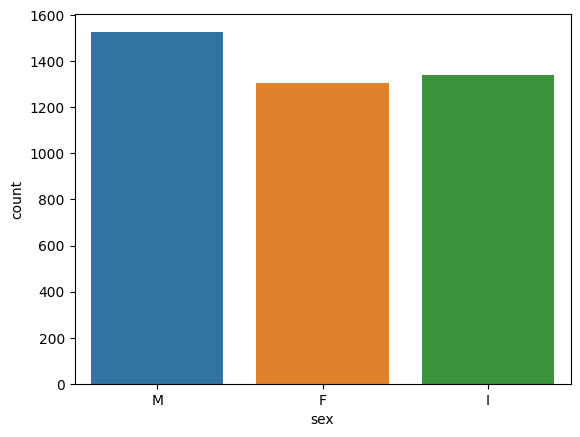

In [ ]:
sns.countplot(x='sex', data=data)
plt.show()

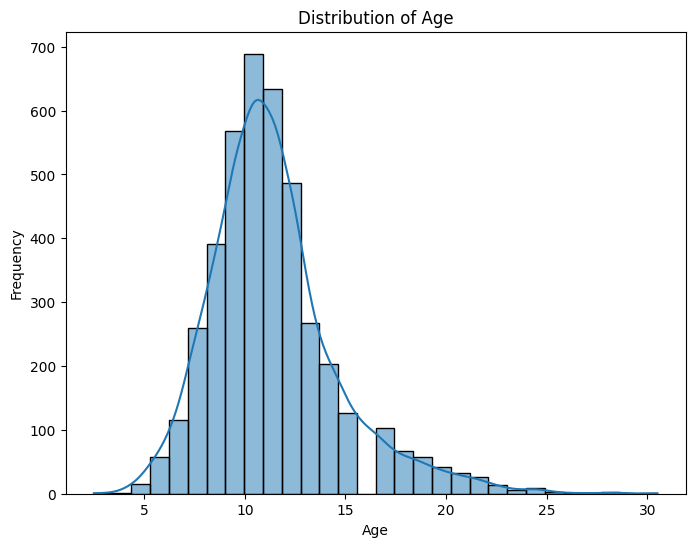

In [ ]:
# Visualize the distribution of the target variable ('age')
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
final_data = pd.concat([pd.get_dummies(data.sex, drop_first=True), data.drop('sex', 1)], axis=1)
final_data.head()

<ipython-input-17-f962118181da>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  final_data = pd.concat([pd.get_dummies(data.sex, drop_first=True), data.drop('sex', 1)], axis=1)


,I,M,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings,age
0,0,1,91,73,19,102.8,44.9,20.2,30.0,15,16.5
1,0,1,70,53,18,45.1,19.9,9.7,14.0,7,8.5
2,0,0,106,84,27,135.4,51.3,28.3,42.0,9,10.5
3,0,1,88,73,25,103.2,43.1,22.8,31.0,10,11.5
4,1,0,66,51,16,41.0,17.9,7.9,11.0,7,8.5


In [ ]:
X, y = final_data.drop('rings', 1).values, final_data.rings.values
X.shape, y.shape

<ipython-input-18-b7b88dd3d13e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X, y = final_data.drop('rings', 1).values, final_data.rings.values


((4177, 10), (4177,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Calculate Mean Squared Error (MSE) for training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [ ]:
print(f'Mean Squared Error (MSE) - Training Set:')
print(mse_train)
print(f'Mean Squared Error (MSE) - Testing Set:')
print(mse_test)

Mean Squared Error (MSE) - Training Set:
4.5424374703219095e-29
Mean Squared Error (MSE) - Testing Set:
5.01662693363276e-29


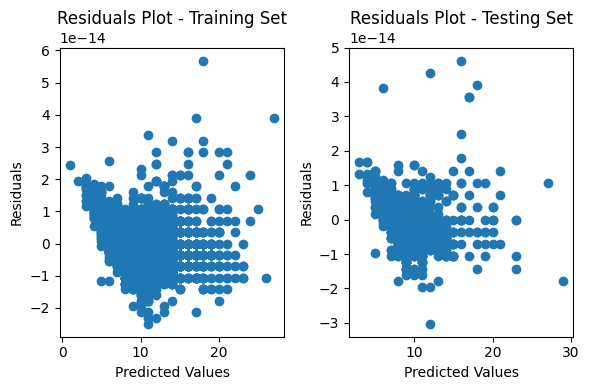

In [ ]:
# Calculate residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(6, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, residuals_train)
plt.title('Residuals Plot - Training Set')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, residuals_test)
plt.title('Residuals Plot - Testing Set')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()